In [1]:
import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD, CRD
from MDAnalysis.analysis import rms

import pandas as pd
# the next line is necessary to display plots in Jupyter
%matplotlib inline

In [2]:
u = mda.Universe('step3_charmm2namd.psf', 'step5_2.dcd')  
ref = mda.Universe('step3_charmm2namd.psf', 'step3_charmm2namd.pdb')  

# RMSD between 2 sets of coordinates

In [3]:
rms.rmsd(u.select_atoms('backbone').positions,  # coordinates to align
         ref.select_atoms('backbone').positions,  # reference coordinates
         center=True,  # subtract the center of geometry
         superposition=True)  # superimpose coordinates

5.557693516037471

# RMSD for multiple selelction

In [4]:
CORE = 'backbone and (resid 1-29 or resid 60-121 or resid 160-214)'
LID = 'backbone and resid 122-159'
NMP = 'backbone and resid 30-59'

In [5]:
R = rms.RMSD(u,  # universe to align
             u,  # reference universe or atomgroup
             select='backbone',  # group to superimpose and calculate RMSD
             groupselections=[CORE, LID, NMP],  # groups for RMSD
             ref_frame=0)  # frame index of the reference
R.run()

/home/alaooj/anaconda3/lib/python3.8/site-packages/MDAnalysis/analysis/rms.py:255: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(np.sum((a - b) ** 2) / N)


In [6]:
R.rmsd.shape

(10, 6)

In [7]:
df = pd.DataFrame(R.rmsd,df_charge = pd.DataFrame(R_charge.rmsd,
                         columns=['Frame',
                                'Time (ns)',
                                'C-alphas', 'CORE',
                                'LID', 'NMP'])
ax_charge = df_charge.plot(x='Frame',
                           y=['C-alphas', 'CORE', 'LID', 'NMP'])
ax_charge.set_ylabel('Charge-weighted RMSD ($\AA$)')
                  columns=['Frame', 'Time (ns)',
                           'Backbone', 'CORE',
                           'LID', 'NMP'])

df

,Frame,Time (ns),Backbone,CORE,LID,NMP
0,0.0,100.000000,0.000001,0.000001,0.000001,NaN
1,1.0,200.000001,2.346296,2.149729,1.675609,NaN
2,2.0,300.000001,2.906242,2.331422,1.837289,NaN
3,3.0,400.000001,3.840399,3.085732,3.280397,NaN
4,4.0,500.000001,3.977046,2.188365,2.392543,NaN
5,5.0,600.000002,4.353016,3.085668,3.404694,NaN
6,6.0,700.000002,4.481059,3.064473,3.115445,NaN
7,7.0,800.000002,4.307486,3.992661,3.394916,NaN
8,8.0,900.000003,4.786702,4.524129,3.722748,NaN
9,9.0,1000.000003,4.925313,4.370622,4.095761,NaN


Text(0, 0.5, 'RMSD ($\\AA$)')

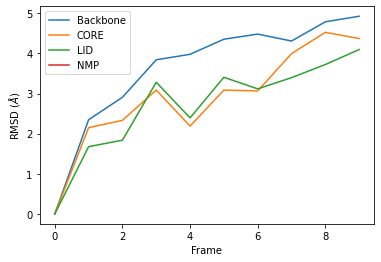

In [8]:
ax = df.plot(x='Frame', y=['Backbone', 'CORE', 'LID', 'NMP'],
             kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')df_charge = pd.DataFrame(R_charge.rmsd,
                         columns=['Frame',
                                'Time (ns)',
                                'C-alphas', 'CORE',
                                'LID', 'NMP'])
ax_charge = df_charge.plot(x='Frame',
                           y=['C-alphas', 'CORE', 'LID', 'NMP'])
ax_charge.set_ylabel('Charge-weighted RMSD ($\AA$)')

# RMSD of an atom grop within a trajectory

In [9]:
ca = u.select_atoms('name CA')

R = rms.RMSD(ca, ca, select=CORE, ref_frame=0)
R.run()

Text(0, 0.5, 'RMSD ($\\AA$)')

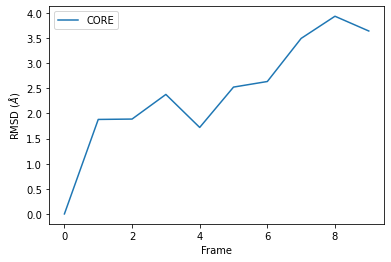

In [10]:
df = pd.DataFrame(R.rmsd,
                  columns=['Frame', 'Time (ns)',df_charge = pd.DataFrame(R_charge.rmsd,
                         columns=['Frame',
                                'Time (ns)',
                                'C-alphas', 'CORE',
                                'LID', 'NMP'])
ax_charge = df_charge.plot(x='Frame',
                           y=['C-alphas', 'CORE', 'LID', 'NMP'])
ax_charge.set_ylabel('Charge-weighted RMSD ($\AA$)')
                           'CORE'])

ax = df.plot(x='Frame', y='CORE', kind='line')
ax.set_ylabel('RMSD ($\AA$)')

# weighted Average

In [11]:
R_mass = rms.RMSD(u, u,
                  select='protein and name CA',
                  weights='mass',
                  groupselections=[CORE, LID, NMP])
R_mass.run()

/home/alaooj/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/alaooj/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alaooj/anaconda3/lib/python3.8/site-packages/MDAnalysis/analysis/rms.py:252: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(np.sum(weights[:, np.newaxis]


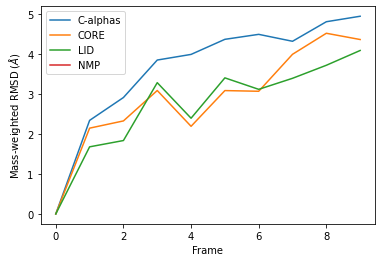

In [12]:
df_mass = pd.DataFrame(R_mass.rmsd,
                       columns=['Frame',
                                'Time (ns)',
                                'C-alphas', 'CORE',
                                'LID', 'NMP'])
ax_mass = df_mass.plot(x='Frame',
                       y=['C-alphas', 'CORE', 'LID', 'NMP'])
ax_mass.set_ylabel('Mass-weighted RMSD ($\AA$)');

# custom weight. Ignoe, its not conventional

In [13]:
ag = u.select_atoms('protein and name CA')
print('Shape of C-alpha charges:', ag.charges.shape)
core = u.select_atoms(CORE)
lid = u.select_atoms(LID)
nmp = u.select_atoms(NMP)

Shape of C-alpha charges: (1322,)


In [16]:
R_charge = rms.RMSD(u, u,
                    select='protein and name CA',
                    groupselections=[CORE, LID, NMP],
                    weights=ag.resids,
                    weights_groupselections=[core.resids,
                                             lid.resids,
                                             nmp.resids])

In [17]:
df_charge = pd.DataFrame(R_charge.rmsd,
                         columns=['Frame',
                                'Time (ns)',
                                'C-alphas', 'CORE',
                                'LID', 'NMP'])
ax_charge = df_charge.plot(x='Frame',
                           y=['C-alphas', 'CORE', 'LID', 'NMP'])
ax_charge.set_ylabel('Charge-weighted RMSD ($\AA$)')

AttributeError: 'RMSD' object has no attribute 'rmsd'